In [39]:
import pandas as pd

# Read data from 3_12_16 to 4_11_16
minuteCalories = pd.read_csv("/Users/png/Documents/MSDS601_Linear_Regression_Analysis/MSDS601_Group_Project/Functional_Regression/Data/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv")
minuteIntensities = pd.read_csv("/Users/png/Documents/MSDS601_Linear_Regression_Analysis/MSDS601_Group_Project/Functional_Regression/Data/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv")
minuteMETs = pd.read_csv("/Users/png/Documents/MSDS601_Linear_Regression_Analysis/MSDS601_Group_Project/Functional_Regression/Data/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv")
minuteSleep = pd.read_csv("/Users/png/Documents/MSDS601_Linear_Regression_Analysis/MSDS601_Group_Project/Functional_Regression/Data/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv")
minuteSteps = pd.read_csv("/Users/png/Documents/MSDS601_Linear_Regression_Analysis/MSDS601_Group_Project/Functional_Regression/Data/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv")

In [40]:
minuteCalories.head()

,Id,ActivityMinute,Calories
0,1503960366,3/12/2016 12:00:00 AM,0.7973
1,1503960366,3/12/2016 12:01:00 AM,0.7973
2,1503960366,3/12/2016 12:02:00 AM,0.7973
3,1503960366,3/12/2016 12:03:00 AM,0.7973
4,1503960366,3/12/2016 12:04:00 AM,0.7973


In [41]:
minuteIntensities.head()

,Id,ActivityMinute,Intensity
0,1503960366,3/12/2016 12:00:00 AM,0
1,1503960366,3/12/2016 12:01:00 AM,0
2,1503960366,3/12/2016 12:02:00 AM,0
3,1503960366,3/12/2016 12:03:00 AM,0
4,1503960366,3/12/2016 12:04:00 AM,0


In [42]:
minuteMETs.head()

,Id,ActivityMinute,METs
0,1503960366,3/12/2016 12:00:00 AM,10
1,1503960366,3/12/2016 12:01:00 AM,10
2,1503960366,3/12/2016 12:02:00 AM,10
3,1503960366,3/12/2016 12:03:00 AM,10
4,1503960366,3/12/2016 12:04:00 AM,10


In [43]:
minuteSleep.head()

,Id,date,value,logId
0,1503960366,3/13/2016 2:39:30 AM,1,11114919637
1,1503960366,3/13/2016 2:40:30 AM,1,11114919637
2,1503960366,3/13/2016 2:41:30 AM,1,11114919637
3,1503960366,3/13/2016 2:42:30 AM,1,11114919637
4,1503960366,3/13/2016 2:43:30 AM,1,11114919637


In [44]:
minuteSteps.head()

,Id,ActivityMinute,Steps
0,1503960366,3/12/2016 12:00:00 AM,0
1,1503960366,3/12/2016 12:01:00 AM,0
2,1503960366,3/12/2016 12:02:00 AM,0
3,1503960366,3/12/2016 12:03:00 AM,0
4,1503960366,3/12/2016 12:04:00 AM,0


In [46]:
minuteSleep.head()

,Id,ActivityMinute,value,logId
0,1503960366,3/13/2016 2:39:30 AM,1,11114919637
1,1503960366,3/13/2016 2:40:30 AM,1,11114919637
2,1503960366,3/13/2016 2:41:30 AM,1,11114919637
3,1503960366,3/13/2016 2:42:30 AM,1,11114919637
4,1503960366,3/13/2016 2:43:30 AM,1,11114919637


In [47]:
#Inconsistent date column in Sleep dataframe
if "date" in minuteSleep.columns:
    minuteSleep = minuteSleep.rename(columns={"date": "ActivityMinute"})

#Ensure all timestamps are parsed consistently
for df in [minuteCalories, minuteIntensities, minuteMETs, minuteSleep, minuteSteps]:
    df["ActivityMinute"] = pd.to_datetime(df["ActivityMinute"])

#Merge dataframes
merged = (
    minuteCalories
        .merge(minuteIntensities, on=["Id", "ActivityMinute"], how="inner")
        .merge(minuteMETs,        on=["Id", "ActivityMinute"], how="inner")
        .merge(minuteSleep,       on=["Id", "ActivityMinute"], how="inner")
        .merge(minuteSteps,       on=["Id", "ActivityMinute"], how="inner")
        .sort_values(["Id", "ActivityMinute"])
        .reset_index(drop=True)
)

/var/folders/k0/hlz149vj4dx8_mt5pkd4tz600000gn/T/ipykernel_7378/564608170.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ActivityMinute"] = pd.to_datetime(df["ActivityMinute"])
/var/folders/k0/hlz149vj4dx8_mt5pkd4tz600000gn/T/ipykernel_7378/564608170.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ActivityMinute"] = pd.to_datetime(df["ActivityMinute"])
/var/folders/k0/hlz149vj4dx8_mt5pkd4tz600000gn/T/ipykernel_7378/564608170.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ActivityMinute"] = pd.to_datetime(df["ActivityMinute"])
/var/folders/k0/hlz149

In [48]:
merged.head()

,Id,ActivityMinute,Calories,Intensity,METs,value,logId,Steps
0,1503960366,2016-03-14 01:32:00,0.7977,0,10,2,11126343681,0
1,1503960366,2016-03-14 01:33:00,0.7977,0,10,2,11126343681,0
2,1503960366,2016-03-14 01:34:00,0.7977,0,10,1,11126343681,0
3,1503960366,2016-03-14 01:35:00,0.7977,0,10,1,11126343681,0
4,1503960366,2016-03-14 01:36:00,0.7977,0,10,1,11126343681,0


In [50]:
# Read data from 4_12_16 to 5_12_16
minuteCalories = pd.read_csv("/Users/png/Documents/MSDS601_Linear_Regression_Analysis/MSDS601_Group_Project/Functional_Regression/Data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minuteIntensities = pd.read_csv("/Users/png/Documents/MSDS601_Linear_Regression_Analysis/MSDS601_Group_Project/Functional_Regression/Data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minuteMETs = pd.read_csv("/Users/png/Documents/MSDS601_Linear_Regression_Analysis/MSDS601_Group_Project/Functional_Regression/Data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
minuteSleep = pd.read_csv("/Users/png/Documents/MSDS601_Linear_Regression_Analysis/MSDS601_Group_Project/Functional_Regression/Data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
minuteSteps = pd.read_csv("/Users/png/Documents/MSDS601_Linear_Regression_Analysis/MSDS601_Group_Project/Functional_Regression/Data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")

In [51]:
if "date" in minuteSleep.columns:
    minuteSleep = minuteSleep.rename(columns={"date": "ActivityMinute"})

# 2) Ensure all timestamps are parsed consistently
for df in [minuteCalories, minuteIntensities, minuteMETs, minuteSleep, minuteSteps]:
    df["ActivityMinute"] = pd.to_datetime(df["ActivityMinute"])

# 3a) Merge sequentially (readable)
merged_2 = (
    minuteCalories
        .merge(minuteIntensities, on=["Id", "ActivityMinute"], how="inner")
        .merge(minuteMETs,        on=["Id", "ActivityMinute"], how="inner")
        .merge(minuteSleep,       on=["Id", "ActivityMinute"], how="inner")
        .merge(minuteSteps,       on=["Id", "ActivityMinute"], how="inner")
        .sort_values(["Id", "ActivityMinute"])
        .reset_index(drop=True))

/var/folders/k0/hlz149vj4dx8_mt5pkd4tz600000gn/T/ipykernel_7378/581859822.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ActivityMinute"] = pd.to_datetime(df["ActivityMinute"])
/var/folders/k0/hlz149vj4dx8_mt5pkd4tz600000gn/T/ipykernel_7378/581859822.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ActivityMinute"] = pd.to_datetime(df["ActivityMinute"])
/var/folders/k0/hlz149vj4dx8_mt5pkd4tz600000gn/T/ipykernel_7378/581859822.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ActivityMinute"] = pd.to_datetime(df["ActivityMinute"])
/var/folders/k0/hlz149

In [52]:
merged_2.head()

,Id,ActivityMinute,Calories,Intensity,METs,value,logId,Steps
0,1503960366,2016-04-13 20:10:00,0.7865,0,10,1,11388770716,0
1,1503960366,2016-04-13 20:11:00,0.7865,0,10,1,11388770716,0
2,1503960366,2016-04-13 20:12:00,0.7865,0,10,1,11388770716,0
3,1503960366,2016-04-13 20:13:00,0.7865,0,10,1,11388770716,0
4,1503960366,2016-04-13 20:14:00,0.7865,0,10,1,11388770716,0


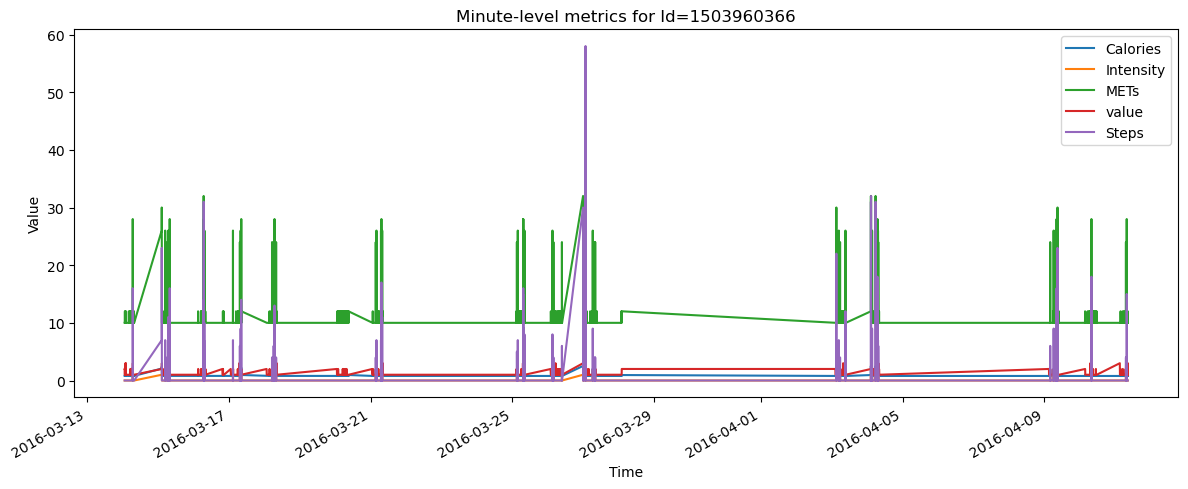

In [53]:
import matplotlib.pyplot as plt


target_id = 1503960366  # <-- change to an Id in your data
cols = ["Calories", "Intensity", "METs", "value", "Steps"]

df_id = (merged[merged["Id"] == target_id]
         .sort_values("ActivityMinute")
         .set_index("ActivityMinute"))

ax = df_id[cols].plot(figsize=(12, 5))
ax.set_title(f"Minute-level metrics for Id={target_id}")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
plt.tight_layout()
plt.show()

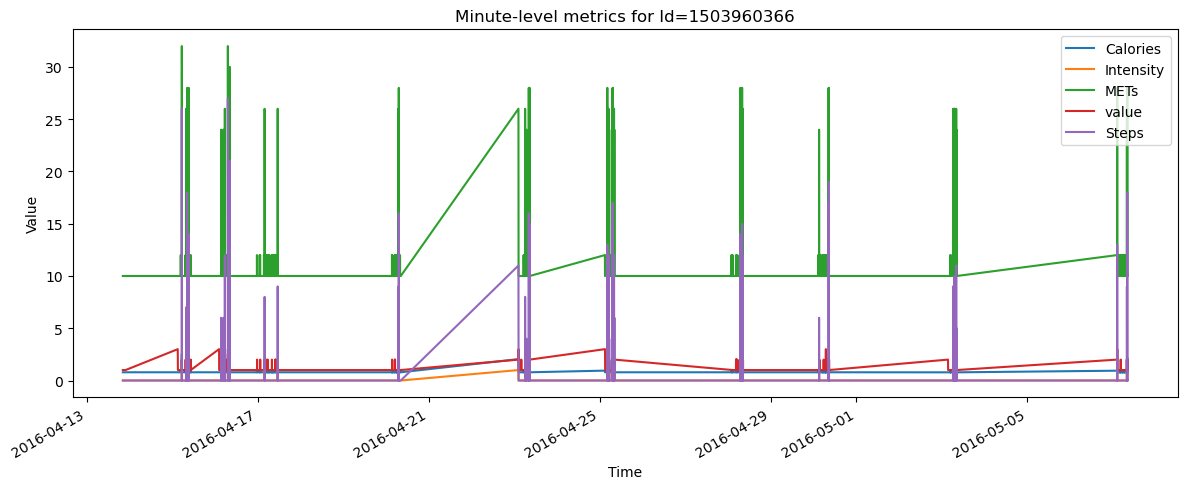

In [55]:
target_id = 1503960366  # <-- change to an Id in your data
cols = ["Calories", "Intensity", "METs", "value", "Steps"]

df_id = (merged_2[merged_2["Id"] == target_id]
         .sort_values("ActivityMinute")
         .set_index("ActivityMinute"))

ax = df_id[cols].plot(figsize=(12, 5))
ax.set_title(f"Minute-level metrics for Id={target_id}")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
plt.tight_layout()
plt.show()

In [61]:
merged_final = pd.concat([merged,  merged_2], ignore_index=True)


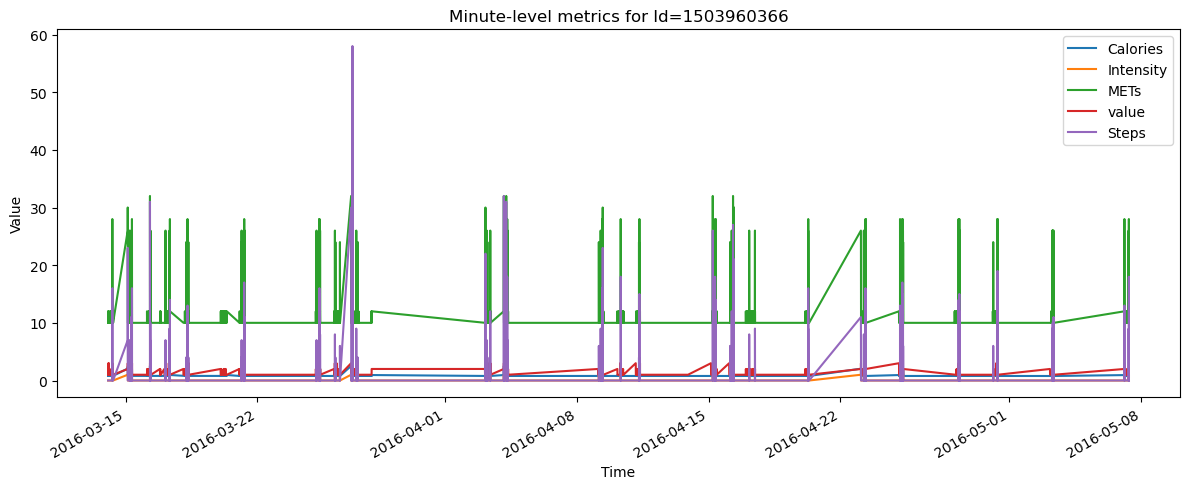

In [62]:
target_id = 1503960366  # <-- change to an Id in your data
cols = ["Calories", "Intensity", "METs", "value", "Steps"]

df_id = (merged_final[merged_final["Id"] == target_id]
         .sort_values("ActivityMinute")
         .set_index("ActivityMinute"))

ax = df_id[cols].plot(figsize=(12, 5))
ax.set_title(f"Minute-level metrics for Id={target_id}")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
plt.tight_layout()
plt.show()